In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv


# Problem Statement: Estimate annual healthcare costs for patients based
on factors such as age, gender, medical history, lifestyle choices (e.g.,
smoking, exercise), and geographic location.


In [86]:
df = pd.read_csv("/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv")
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.drop(['index'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#  missing values finding using value_counts and unique()

- here there is no missing values exist but finding missing values using this functions to find any nun values exists 

In [89]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [90]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [91]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [92]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [93]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [94]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [95]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'sex' column
df['sex'] = le.fit_transform(df['sex'])

# Apply LabelEncoder to the 'smoker' column
df['smoker'] = le.fit_transform(df['smoker'])

df['region'] = le.fit_transform(df['region'])


df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [97]:
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [98]:
df['sex'].unique()

array([0, 1])

In [99]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [100]:
df['smoker'].unique()

array([1, 0])

In [101]:
df['region'].value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [102]:
df['region'].unique()

array([3, 2, 1, 0])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [104]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [105]:
import matplotlib.pyplot as plt

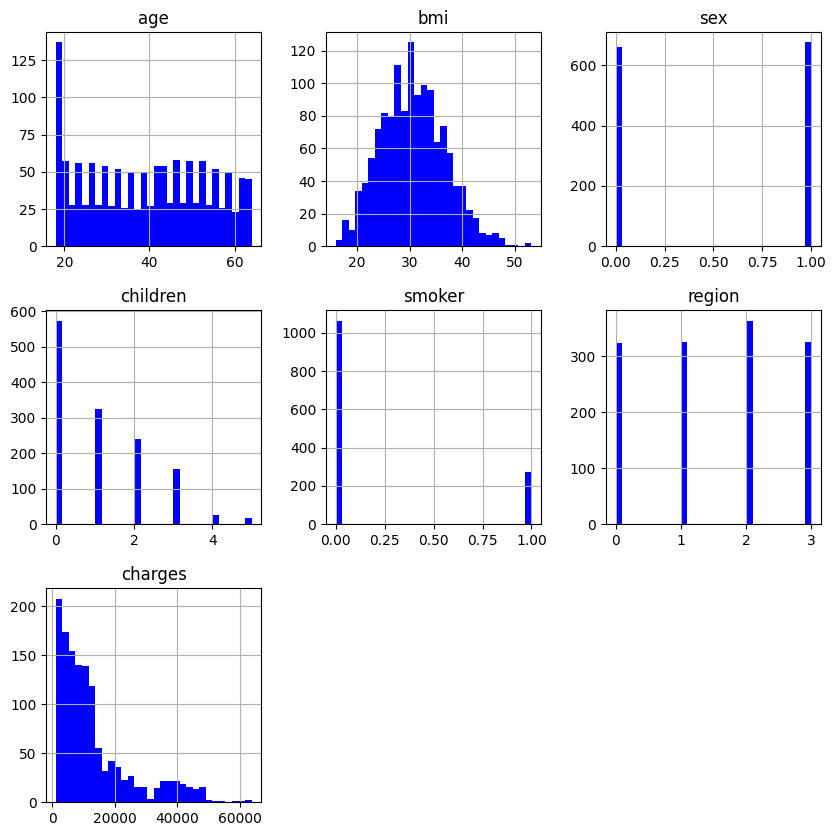

In [106]:
df[['age','bmi','sex','children','smoker','region','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [107]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='charges'>

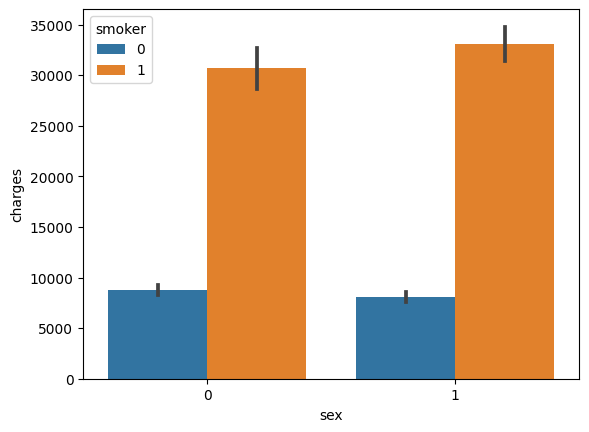

In [108]:
sns.barplot(data = df,x = 'sex',y = 'charges',hue = "smoker")

- here the 0 refers to no and 1 refers to yes in this bar plot

<Axes: >

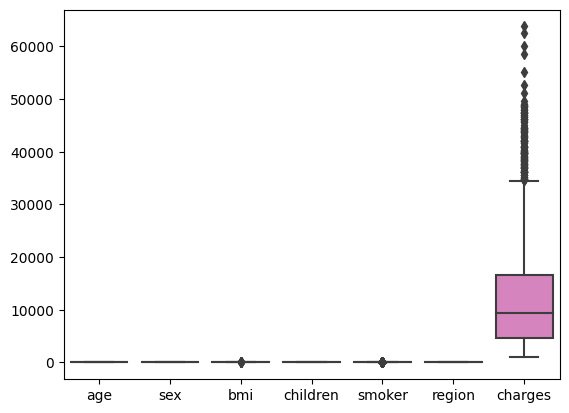

In [109]:
sns.boxplot(data=df)

# Remove outliers

In [110]:

def remove_outliers(df, columns):
    # Calculate the first and third quartiles
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[columns] >= (Q1 - 1.5 * IQR)) & (df[columns] <= (Q3 + 1.5 * IQR))]
    return df_filtered


# Specify the columns to clean
columns_to_clean = ['age', 'sex', 'bmi','children','smoker','region','charges']

# Remove outliers
df_cleaned = remove_outliers(df, columns_to_clean)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0     NaN       3  16884.92400
1      18    1  33.770         1     0.0       2   1725.55230
2      28    1  33.000         3     0.0       2   4449.46200
3      33    1  22.705         0     0.0       1  21984.47061
4      32    1  28.880         0     0.0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3     0.0       1  10600.54830
1334   18    0  31.920         0     0.0       0   2205.98080
1335   18    0  36.850         0     0.0       2   1629.83350
1336   21    0  25.800         0     0.0       3   2007.94500
1337   61    0  29.070         0     NaN       1  29141.36030

[1338 rows x 7 columns]


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [112]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [113]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [114]:
fetr = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
fetr.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [115]:
trgt = df['charges']
trgt.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(fetr, trgt, test_size=0.2, random_state=42)

In [117]:
# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


In [118]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


# LinearRegression

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # this is changes in classification projectr2 score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train (fit) the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [120]:
# Predict on the test data
y_predlr = lr.predict(X_test)

In [121]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_predlr)

# Calculate the R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_predlr)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 33635210.431178406
R-squared: 0.7833463107364539


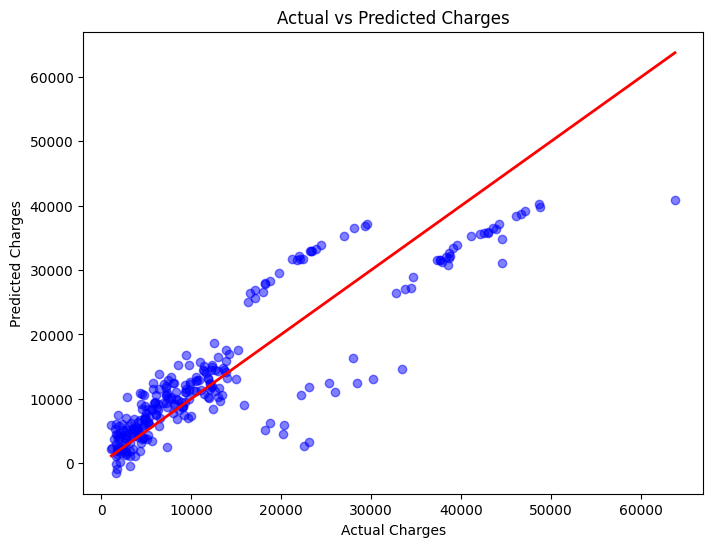

In [122]:
import matplotlib.pyplot as plt


# Plot actual vs predicted values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predlr, color='blue', alpha=0.5)

#  Plot the line representing perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

plt.show()

# HuberRegression

In [123]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score   # this is changes in classification projectr2 score
                                         # msc score and r2 score change varum classificational

# Initialize the HuberRegressor model
lrhuber = HuberRegressor()

# Train (fit) the model on the training data
lrhuber .fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [124]:
# Predict on the test data
y_predhuber  = lrhuber.predict(X_test)

In [125]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_predhuber)

# Calculate the R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_predhuber)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 42638144.68690292
R-squared: 0.7253559222210955


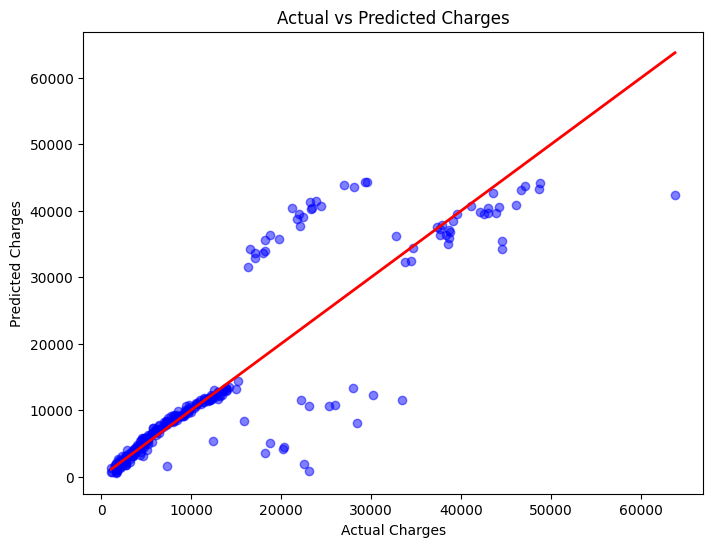

In [126]:
import matplotlib.pyplot as plt


# Plot actual vs predicted values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predhuber, color='blue', alpha=0.5)

#  Plot the line representing perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

plt.show()

# DecisionTreeRegression

In [127]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit the model
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [128]:
# Predict the test set results
y_preddec = tree_regressor.predict(X_test_scaled)

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_preddec)
print("Mean Squared Error (MSE):", mse)


# Calculate R-squared
r2 = r2_score(y_test, y_preddec)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 47349691.413584165
R-squared (R²): 0.6950075471882797


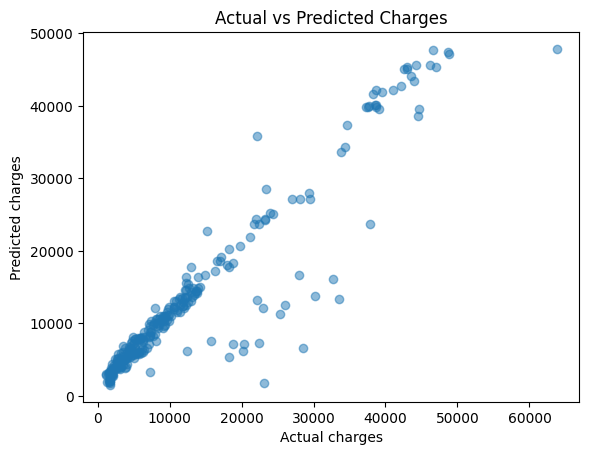

In [130]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Charges")
plt.show()

# RandomForestRegression

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [132]:
# Predict the test set results
y_predrand = forest_regressor.predict(X_test_scaled)

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_predrand)
print("Mean Squared Error (MSE):", mse)


# Calculate R-squared
r2 = r2_score(y_test, y_predrand)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 20898625.73754565
R-squared (R²): 0.8653861739369313


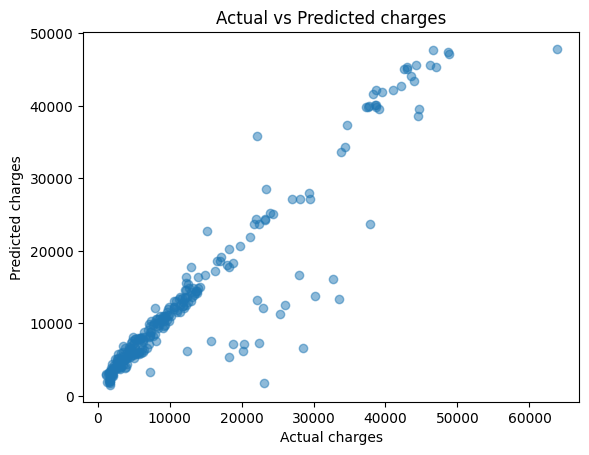

In [134]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted charges")
plt.show()


# GradientBoostingRegression

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [136]:
# Predict the test set results
y_predgra = gb_regressor.predict(X_test_scaled)

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_predgra)
print("Mean Squared Error (MSE):", mse)


# Calculate R-squared
r2 = r2_score(y_test, y_predgra)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 18932125.40806312
R-squared (R²): 0.8780529462228404


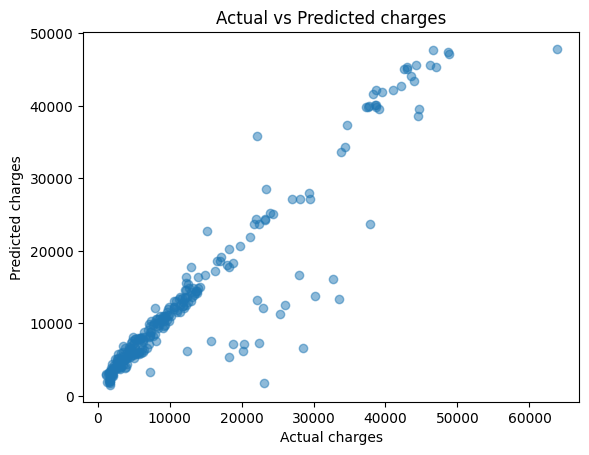

In [138]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted charges")
plt.show()

# one step do all things

In [144]:
def modelevals_fun(model_name,ytst,predval):
    mse = mean_squared_error(y_test, predval)
    r2 = r2_score(y_test, predval)
    print("Model:",model_name)
    print("MSE:",mse)
    print("R2:", r2)
    
    
    
modelevals_fun('Linear reg',y_test,y_predlr)
modelevals_fun('huber reg',y_test,y_predhuber)
modelevals_fun('decision reg',y_test, y_preddec)
modelevals_fun('random reg',y_test, y_predrand)
modelevals_fun('gradi reg',y_test, y_predgra)

Model: Linear reg
MSE: 33635210.431178406
R2: 0.7833463107364539
Model: huber reg
MSE: 42638144.68690292
R2: 0.7253559222210955
Model: decision reg
MSE: 47349691.413584165
R2: 0.6950075471882797
Model: random reg
MSE: 20898625.73754565
R2: 0.8653861739369313
Model: gradi reg
MSE: 18932125.40806312
R2: 0.8780529462228404


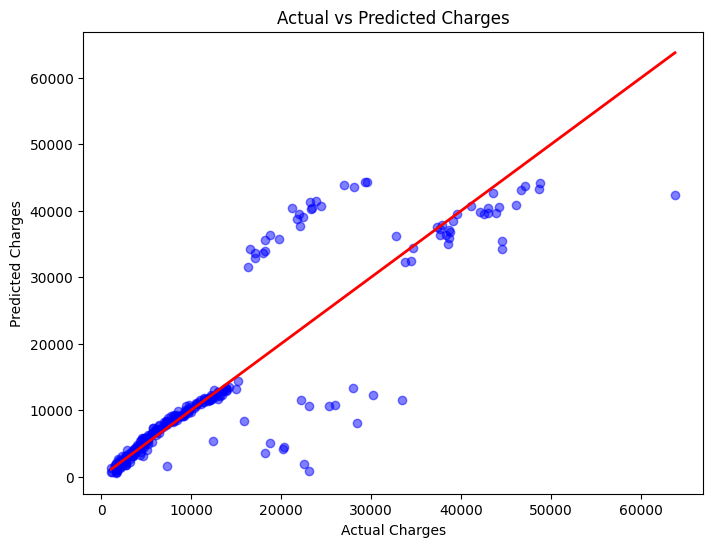

In [140]:
import matplotlib.pyplot as plt


# Plot actual vs predicted values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_predhuber, color='blue', alpha=0.5)

#  Plot the line representing perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

plt.show()


In [141]:

# # Apply One-Hot Encoding using pandas get_dummies()
# df_encoded = pd.get_dummies(df, columns=['region'], drop_first=False)
# df_encoded

In [142]:
# df_encoded.info()